<a href="https://colab.research.google.com/github/piyush02nir/BigMart-Outlet-Sales-Analysis-and-Predictions/blob/main/BigMart_Outlet_Sales_Analysis_and_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

Hypothesis for this mini project:
###Hypothesis 1:
The type of product influences its sales. Certain product categories might be more popular or have higher demand among customers, leading to higher sales compared to other categories. For example, high-demand categories like "Fresh Produce" or "Snacks" might have higher sales compared to less popular categories like "Health and Hygiene."

###Hypothesis 2:
The location type of the store affects product sales. Stores located in urban areas might have higher footfall and customer traffic, resulting in increased sales compared to stores located in rural areas. Thus, products sold in urban stores could exhibit higher sales figures compared to those sold in rural stores.

###Main Libraries used:
• Pandas for data manipulation, aggregation

• Matplotlib and Seaborn for visualization and behavior with respect to the target variable

• NumPy for computationally efficient operations

• Scikit Learn for model training, model optimization, and metrics calculation

Importing necessary Packages

In [54]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import xgboost as xgb

In [55]:
#setting the notebook.
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [56]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Data

In [57]:
# Reading the dataset
test_data = pd.read_csv("/content/drive/MyDrive/Internship/TechnoColabs/Assignment_1/Test.csv")
train_data = pd.read_csv("/content/drive/MyDrive/Internship/TechnoColabs/Assignment_1/Train.csv")

#### Dataset First Look

In [58]:
# Dataset First Look
print('------------------------------------Head---------------------------------------\n')
train_data.head()            #checking 1st 5 rows of the df

------------------------------------Head---------------------------------------



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
print('\n------------------------------------Tail---------------------------------------\n')
train_data.tail()            #checking last 5 rows of the df


------------------------------------Tail---------------------------------------



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


####Dataset Rows & Columns count

In [60]:
print('\n------------------------------------Shape-------------------------------------\n')
                              #no. of rows and columns
print(f'Rows: {train_data.shape[0]}, Columns: {train_data.shape[1]}\n')


------------------------------------Shape-------------------------------------

Rows: 8523, Columns: 12



####Dataset Information



In [61]:
print('------------------------------------Info--------------------------------------\n')
train_data.info()            #information about the df

------------------------------------Info--------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1),

In [62]:
# data description
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


####Duplicate Values



In [63]:
# To find the duplicate values
print('Total number of duplicate data is :',train_data.duplicated().sum())

Total number of duplicate data is : 0


####Missing Values/Null Values

In [64]:
# Missing Values/Null Values Count
train_data.isnull().values.any()

True

In [65]:
print('Total number of null value is :',train_data.isnull().sum().max())

Total number of null value is : 2410


In [66]:
# Numeric Variables: Fill missing values with mean or median
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)  # Fill missing values with mean
print(train_data['Item_Weight'].isnull().sum())  # Verify if missing values are filled

0


In [67]:
# Handling missing values in the "Outlet_Size" column
train_data["Outlet_Size"].fillna(train_data["Outlet_Size"].mode()[0], inplace=True)

# Verifying if missing values are filled
print(train_data["Outlet_Size"].isnull().sum())

0


In [68]:
print(train_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [69]:
# Numeric Variables: Fill missing values with mean or median
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)  # Fill missing values with mean
print(test_data['Item_Weight'].isnull().sum())  # Verify if missing values are filled

0


In [70]:
# Handling missing values in the "Outlet_Size" column
test_data["Outlet_Size"].fillna(test_data["Outlet_Size"].mode()[0], inplace=True)

# Verifying if missing values are filled
print(test_data["Outlet_Size"].isnull().sum())

0


In [71]:
print(test_data.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


###EDA

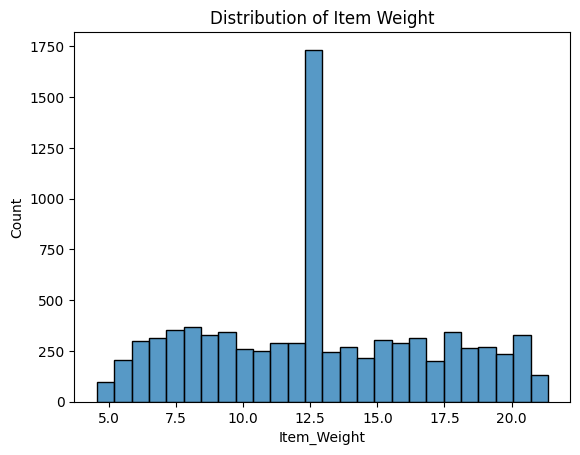

In [72]:
# Distribution of the target variable (e.g., Item_Weight)
sns.histplot(train_data["Item_Weight"])
plt.title("Distribution of Item Weight")
plt.show()

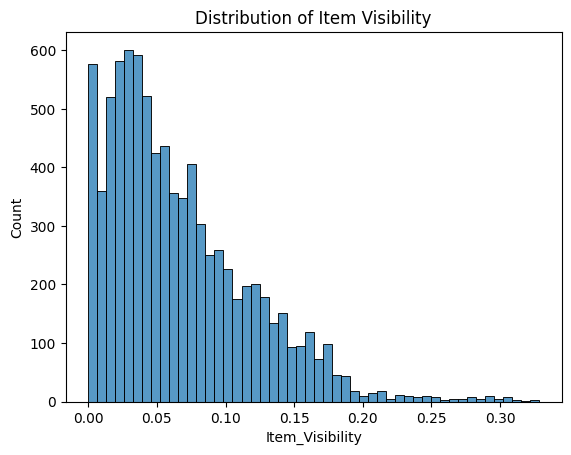

In [73]:
# Distribution of the target variable (e.g., Item_Visibility)
sns.histplot(train_data["Item_Visibility"])
plt.title("Distribution of Item Visibility")
plt.show()

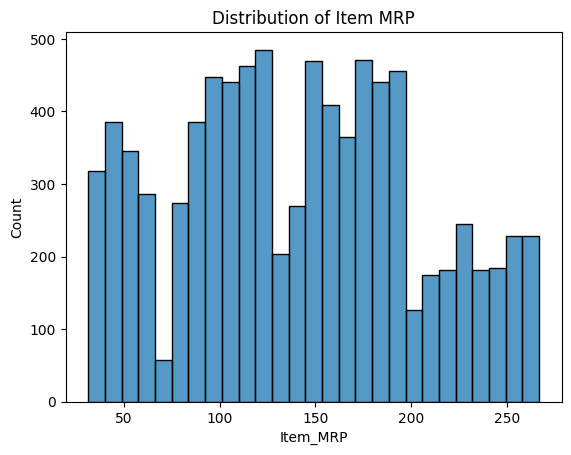

In [74]:
# Distribution of the target variable (e.g., Item_MAP)
sns.histplot(train_data["Item_MRP"])
plt.title("Distribution of Item MRP")
plt.show()

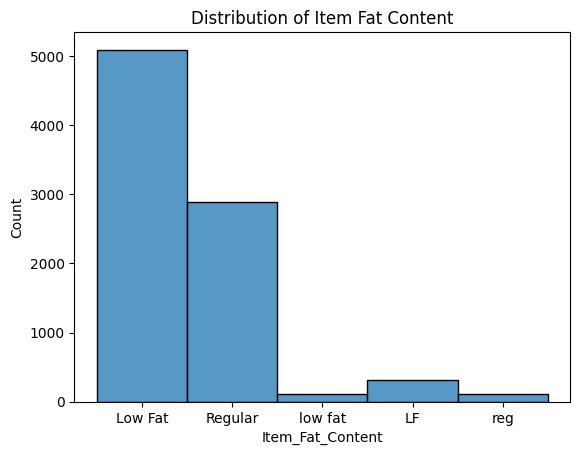

In [75]:
# Distribution of the target variable (e.g., Item_Outlet_Sales)
sns.histplot(train_data["Item_Fat_Content"])
plt.title("Distribution of Item Fat Content")
plt.show()

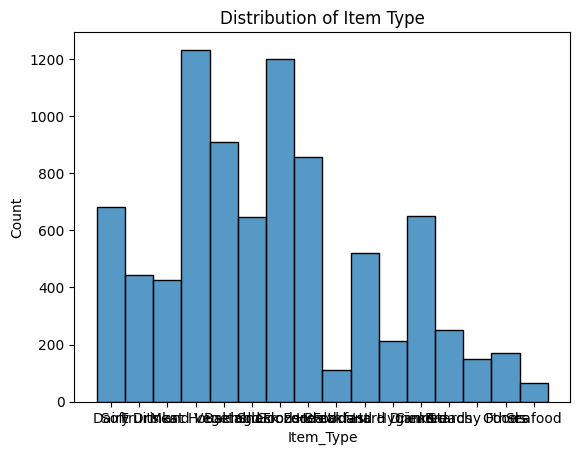

In [76]:
# Distribution of the target variable (e.g., Item_Outlet_Sales)
sns.histplot(train_data["Item_Type"])
plt.title("Distribution of Item Type")
plt.show()

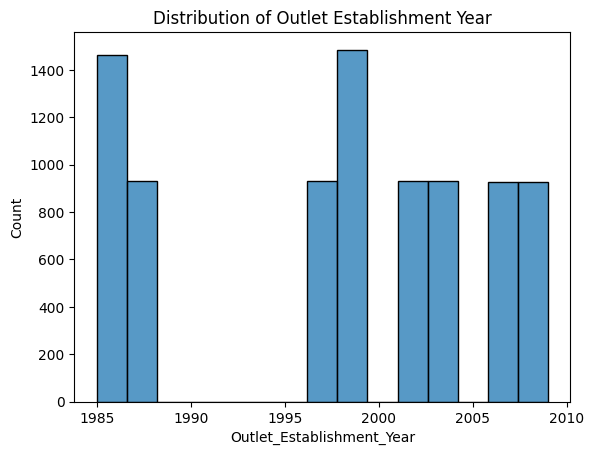

In [77]:
# Distribution of the target variable (e.g., Item_Outlet_Sales)
sns.histplot(train_data["Outlet_Establishment_Year"])
plt.title("Distribution of Outlet Establishment Year")
plt.show()

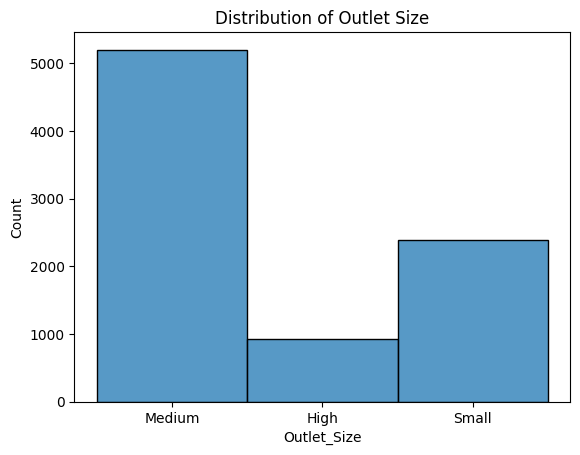

In [78]:
# Distribution of the target variable (e.g., Item_Outlet_Sales)
sns.histplot(train_data["Outlet_Size"])
plt.title("Distribution of Outlet Size")
plt.show()

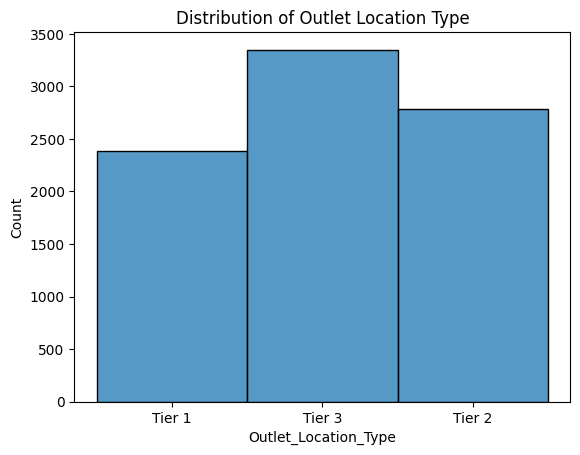

In [79]:
# Distribution of the target variable (e.g., Item_Outlet_Sales)
sns.histplot(train_data["Outlet_Location_Type"])
plt.title("Distribution of Outlet Location Type")
plt.show()

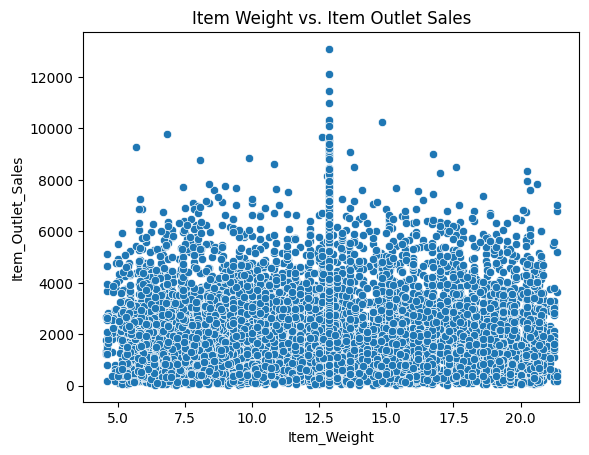

In [80]:
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales", data=train_data)
plt.title("Item Weight vs. Item Outlet Sales")
plt.show()


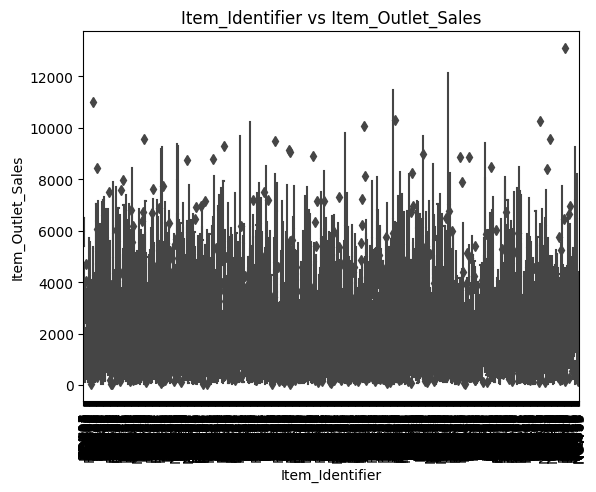

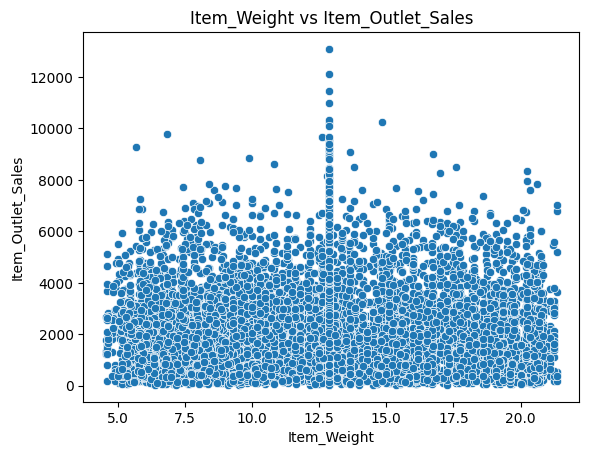

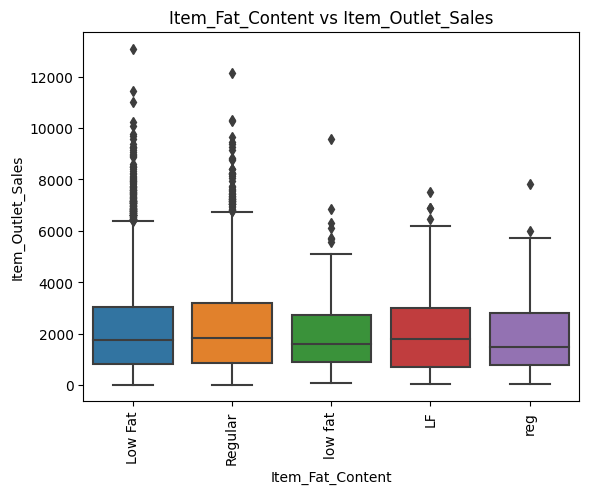

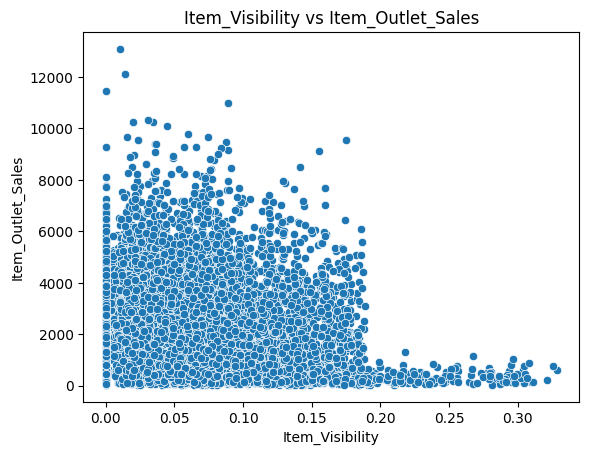

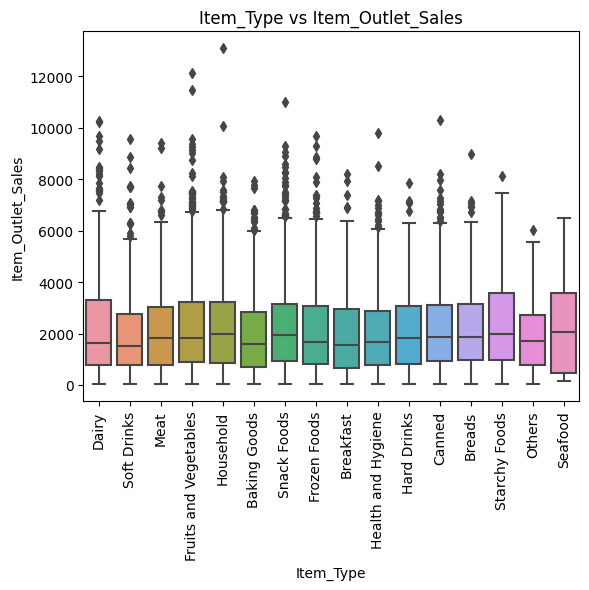

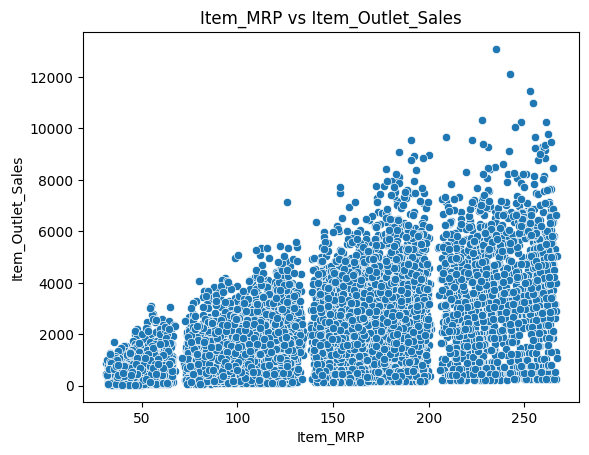

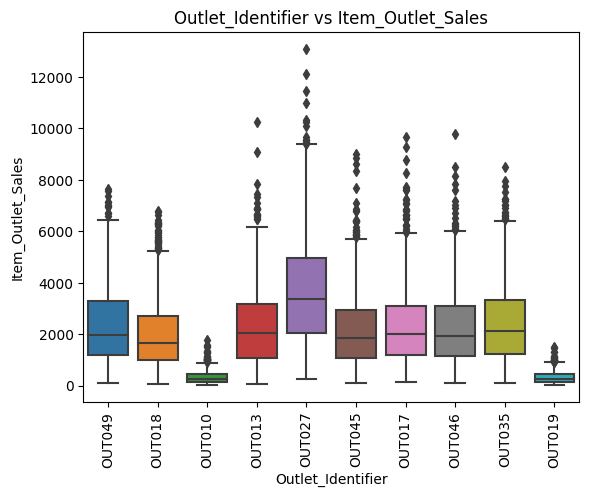

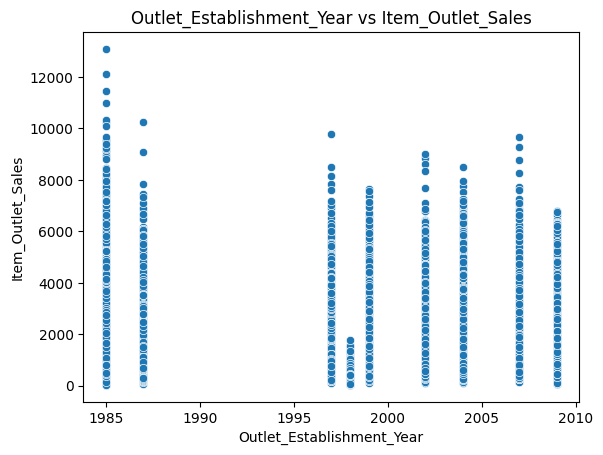

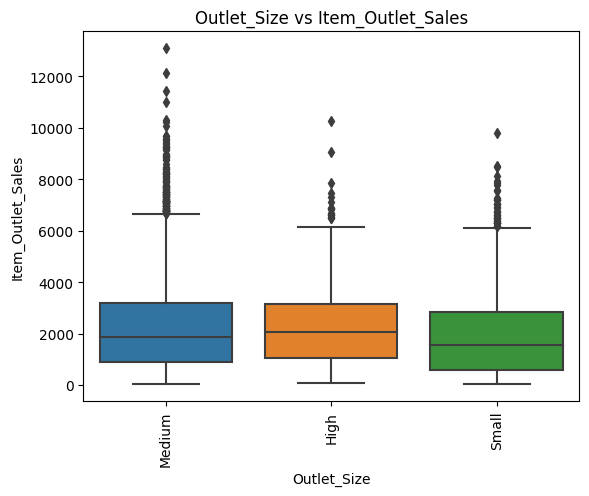

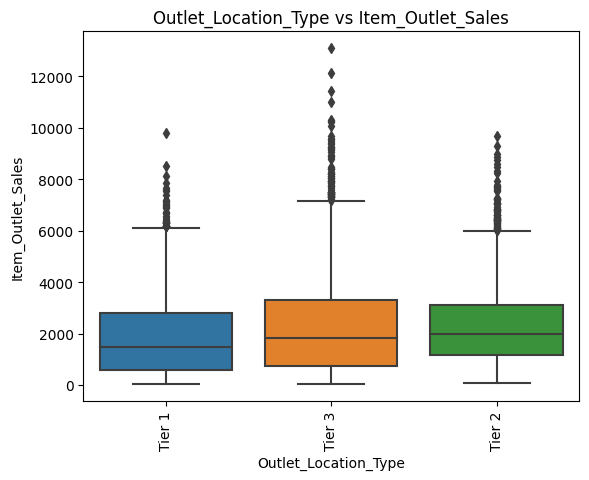

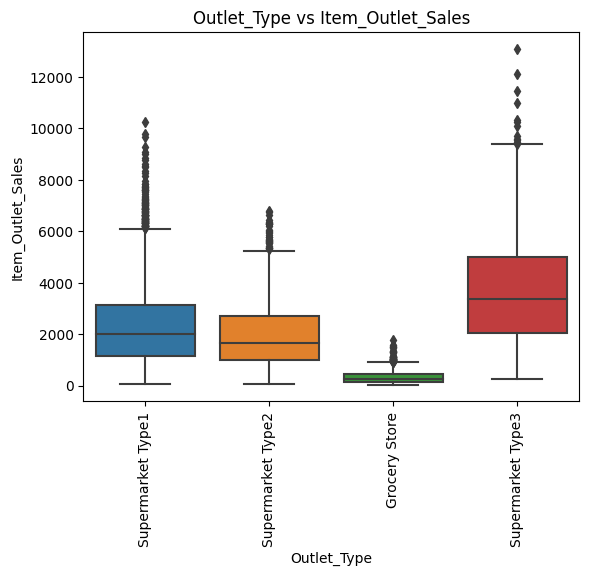

In [81]:
# Bivariate Analysis
target_variable = "Item_Outlet_Sales"
for column in train_data.columns:
    if column != target_variable:
        # Scatter plot for numeric columns
        if train_data[column].dtype in [int, float]:
            sns.scatterplot(x=column, y=target_variable, data=train_data)
            plt.title(f"{column} vs {target_variable}")
            plt.show()
        # Box plot for categorical columns
        else:
            sns.boxplot(x=column, y=target_variable, data=train_data)
            plt.title(f"{column} vs {target_variable}")
            plt.xticks(rotation=90)
            plt.show()


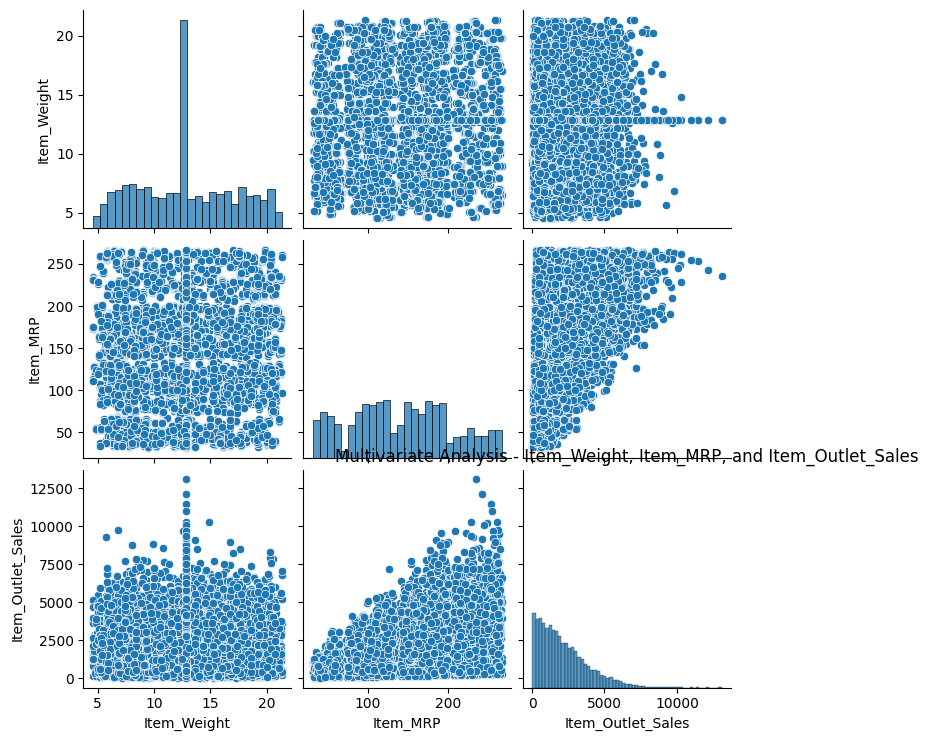

In [82]:
# Multivariate Analysis
sns.pairplot(train_data, vars=["Item_Weight", "Item_MRP", "Item_Outlet_Sales"])
plt.title("Multivariate Analysis - Item_Weight, Item_MRP, and Item_Outlet_Sales")
plt.show()


####One Hot Encoding

In [83]:
categorical_columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

# One-Hot Encoding
train_data_encoded = pd.get_dummies(train_data, columns=categorical_columns)

# Display the encoded dataset
print(train_data_encoded.head())

  Item_Identifier  Item_Weight  Item_Visibility              Item_Type  \
0           FDA15         9.30         0.016047                  Dairy   
1           DRC01         5.92         0.019278            Soft Drinks   
2           FDN15        17.50         0.016760                   Meat   
3           FDX07        19.20         0.000000  Fruits and Vegetables   
4           NCD19         8.93         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Item_Outlet_Sales  \
0  249.8092            OUT049                       1999          3735.1380   
1   48.2692            OUT018                       2009           443.4228   
2  141.6180            OUT049                       1999          2097.2700   
3  182.0950            OUT010                       1998           732.3800   
4   53.8614            OUT013                       1987           994.7052   

   Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0 

In [84]:
categorical_columns = ["Item_Fat_Content", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

# One-Hot Encoding
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns)

# Display the encoded dataset
print(test_data_encoded.head())

  Item_Identifier  Item_Weight  Item_Visibility    Item_Type  Item_MRP  \
0           FDW58    20.750000         0.007565  Snack Foods  107.8622   
1           FDW14     8.300000         0.038428        Dairy   87.3198   
2           NCN55    14.600000         0.099575       Others  241.7538   
3           FDQ58     7.315000         0.015388  Snack Foods  155.0340   
4           FDY38    12.695633         0.118599        Dairy  234.2300   

  Outlet_Identifier  Outlet_Establishment_Year  Item_Fat_Content_LF  \
0            OUT049                       1999                    0   
1            OUT017                       2007                    0   
2            OUT010                       1998                    0   
3            OUT017                       2007                    0   
4            OUT027                       1985                    0   

   Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         1                         0   
1             

In [85]:
test_data_encoded['Item_Outlet_Sales'] = 0

### Linear Regression

In [86]:
# Select the features (independent variables) and the target variable (dependent variable)
features = ["Item_Weight", "Item_Visibility", "Item_MRP"]
target = "Item_Outlet_Sales"

# Separate the features and target variable in the training data
X_train = train_data_encoded[features]
y_train = train_data_encoded[target]

# Separate the features and target variable in the testing data
X_test = test_data_encoded[features]
y_test = test_data_encoded[target]

In [87]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", mse**0.5)
print("Coefficient of Determination (R^2):", r2)
print("Explained Variance Score:", evs)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5745521.107625717
Root Mean Squared Error (RMSE): 2396.98166610129
Coefficient of Determination (R^2): 0.0
Explained Variance Score: 0.0
Mean Absolute Error (MAE): 2184.8101837819668


### Regularized Linear Regression

In [90]:
# Create a Ridge regression model
alpha = 0.5  # Regularization parameter
model = Ridge(alpha=alpha)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", mse**0.5)
print("Coefficient of Determination (R^2):", r2)
print("Explained Variance Score:", evs)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5743215.926508242
Root Mean Squared Error (RMSE): 2396.5007670577206
Coefficient of Determination (R^2): 0.0
Explained Variance Score: 0.0
Mean Absolute Error (MAE): 2184.6828294646425


###Random Forest

In [91]:
# Create a Random Forest model
n_estimators = 100  # Number of decision trees in the forest
model = RandomForestRegressor(n_estimators=n_estimators)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", mse**0.5)
print("Coefficient of Determination (R^2):", r2)
print("Explained Variance Score:", evs)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 6023403.232131621
Root Mean Squared Error (RMSE): 2454.262258221729
Coefficient of Determination (R^2): 0.0
Explained Variance Score: 0.0
Mean Absolute Error (MAE): 2173.8814132314733


###XGBoost

In [92]:
# Create an XGBoost model
model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", mse**0.5)
print("Coefficient of Determination (R^2):", r2)
print("Explained Variance Score:", evs)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5580736.665493742
Root Mean Squared Error (RMSE): 2362.358284742969
Coefficient of Determination (R^2): 0.0
Explained Variance Score: 0.0
Mean Absolute Error (MAE): 2105.6044607478075
